In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv(r'C:\Users\User\Downloads\house_sold.csv')

In [3]:
df.head(10)

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0
5,28.7,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,YES,0.045910,1
6,22.9,37.87,0.524,6.012,66.6,5.87,5.47,5.70,5.20,24.8,12.43,YES,6.958,12.1832,River,41,YES,0.052170,1
7,22.1,37.87,0.524,6.172,96.1,6.04,5.85,6.25,5.66,24.8,19.15,NO,5.842,12.1768,Lake,56,YES,0.057075,1
8,16.5,37.87,0.524,5.631,100.0,6.18,5.85,6.30,6.00,24.8,29.93,YES,5.930,12.1320,None,55,YES,0.056302,0
9,18.9,37.87,0.524,6.004,85.9,6.67,6.55,6.85,6.29,24.8,17.10,YES,9.478,14.1512,River,45,YES,0.050727,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

n_hos_bed has missing values
So imputing with mean

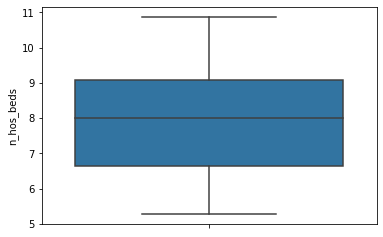

In [5]:
sns.boxplot(y = 'n_hos_beds',data = df)

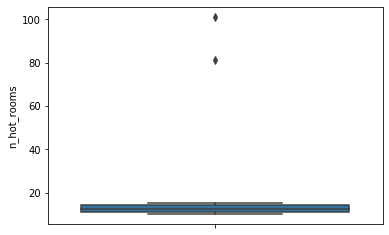

In [6]:
sns.boxplot(y = 'n_hot_rooms',data = df)

Outlier are datapoints are present in n hot rooms

In [ ]:
sns.jointplot(x= 'rainfall',y='Sold',data = df)

Rainfall has outlier

Sold variable is having binary value (0,1)

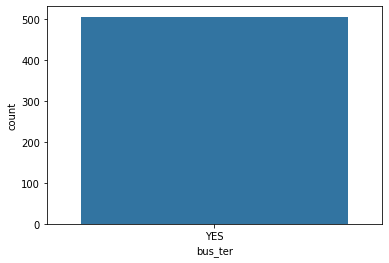

In [8]:
sns.countplot(x = 'bus_ter', data = df)

Carries only YES values. So, this is a constant column and doesnt have any significance 

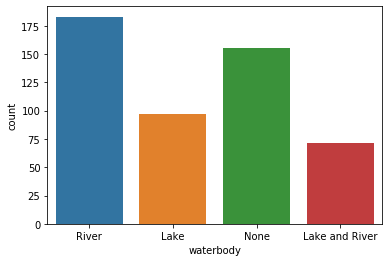

In [9]:
sns.countplot(x = 'waterbody', data = df)

In [10]:
uv = np.percentile(df.n_hot_rooms,[99])[0]
uv

15.399519999999999

In [11]:
df[(df.n_hot_rooms>uv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344,0


In [12]:
df.n_hot_rooms[(df.n_hot_rooms>3*uv)] = 3*uv

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df[(df.n_hot_rooms>uv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344,0


In [14]:
lv = np.percentile(df.rainfall,[1])[0]
lv

20.0

In [15]:
df[(df.rainfall<lv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019,1


In [16]:
df.rainfall[(df.rainfall<0.3*lv)] = 0.3*uv

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df[(df.rainfall<lv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,4.619856,YES,0.044019,1


In [18]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.185019,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.504627,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,4.619856,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000


In [19]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   506 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    float64
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [21]:
df = pd.get_dummies(df)

In [22]:
df

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,...,rainfall,parks,Sold,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,bus_ter_YES
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,...,23.0,0.049347,0,0,1,0,0,0,1,1
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,...,42.0,0.046146,1,1,0,1,0,0,0,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,...,38.0,0.045764,0,1,0,0,0,1,0,1
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,...,45.0,0.047151,0,0,1,1,0,0,0,1
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,...,55.0,0.039474,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,...,27.0,0.056006,1,1,0,0,1,0,0,1
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,...,20.0,0.059903,1,0,1,0,1,0,0,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,...,31.0,0.057572,1,1,0,0,0,1,0,1
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,...,47.0,0.060694,1,0,1,0,0,1,0,1


In [23]:
df['avg_dist'] = (df['dist1'] + df['dist2'] + df['dist3'] + df['dist4']) / 4
df['avg_dist']

0      4.0875
1      4.9675
2      4.9675
3      6.0650
4      6.0625
        ...  
501    2.4775
502    2.2875
503    2.1675
504    2.3900
505    2.5050
Name: avg_dist, Length: 506, dtype: float64

In [24]:
del df['bus_ter_YES']

In [25]:
del df['dist1']

In [26]:
del df['dist2']

In [27]:
del df['dist3']
del df['dist4']
del df['airport_NO']
del df['waterbody_None']

In [28]:
df.corr()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,avg_dist
price,1.000000,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047305,-0.391574,-0.154698,0.182867,0.036233,-0.037497,0.071751,0.249289
resid_area,-0.484754,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055830,0.707635,0.024404,-0.115401,-0.026590,0.051649,-0.098976,-0.708022
air_qual,-0.429300,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.092025,0.915544,-0.004017,-0.073903,-0.046393,0.013849,-0.037772,-0.769247
room_num,0.696304,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064708,-0.282817,0.027148,0.163774,-0.004195,0.010554,0.046251,0.205241
age,-0.377999,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074922,0.673850,-0.016291,0.005101,0.003452,-0.004354,-0.088609,-0.747906
teachers,0.505655,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045886,-0.187004,0.042525,0.069437,0.048717,-0.046981,0.094256,0.232452
poor_prop,-0.740836,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061508,0.552310,-0.082776,-0.095054,0.003197,0.020620,-0.109004,-0.496967
n_hos_beds,0.108880,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058611,-0.071272,0.066847,-0.006365,0.042278,0.059482,-0.074148,-0.027871
n_hot_rooms,0.017007,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.015075,0.023757,-0.090338,-0.055338,0.037925,0.014755,-0.064096,-0.020700
rainfall,-0.047305,0.055830,0.092025,-0.064708,0.074922,-0.045886,0.061508,0.058611,0.015075,1.000000,0.078446,-0.040329,-0.013360,-0.016054,0.109257,-0.036830,-0.037278


In [29]:
x = df[['price']]
y = df[['Sold']]
x

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [30]:
y.head(5)

,Sold
0,0
1,1
2,0
3,0
4,0


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf = LogisticRegression()

In [33]:
clf.fit(x,y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
clf.coef_

array([[-0.03571865]])

In [35]:
clf.intercept_

array([0.61477516])

By default sklearn has zero as constant term. Using statsmodels we will add constant term to the model

In [36]:
import statsmodels.api as sn

In [37]:
x_cons = sn.add_constant(x)
x_cons.head(5)

,const,price
0,1.0,24.0
1,1.0,21.6
2,1.0,34.7
3,1.0,33.4
4,1.0,36.2


In [38]:
import statsmodels.discrete.discrete_model as sm

In [39]:
logreg = sm.Logit(y,x_cons).fit()

Optimization terminated successfully.
         Current function value: 0.676690
         Iterations 5


In [40]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 Jul 2020   Pseudo R-squ.:                 0.01788
Time:                        20:42:05   Log-Likelihood:                -342.41
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 0.0004142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6149      0.248      2.484      0.013       0.130       1.100
price         -0.0357      0.010     -3.417      0.001      -0.056      -0.015
==============================================================================
"""

H0 - X is not impacting Y 
H1 - Not sufficient Evidence for H0
Since the p value is less than 1 %, then price value is impacting the Selling chacnce

Logistic with Multiple Predictor

In [41]:
x = df.loc[:, df.columns != 'Sold']
y = df[['Sold']]
x.head(5)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23.0,0.049347,1,0,0,1,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42.0,0.046146,0,1,0,0,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38.0,0.045764,0,0,0,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45.0,0.047151,1,1,0,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55.0,0.039474,0,1,0,0,6.0625


In [43]:
clf_mul = LogisticRegression()
clf_mul.fit(x,y)
print("Coefficient",clf_mul.coef_)
print("Intercept",clf_mul.intercept_)

Coefficient [[-0.24715607 -0.01777828 -0.19065578  0.85030127 -0.00524952  0.23840747
  -0.2108557   0.1594166  -0.08528905 -0.00688558 -0.0091924  -0.13157933
  -0.053735   -0.01519996  0.17179038 -0.32255235]]
Intercept [-0.00045533]


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
xmul_cons = sn.add_constant(x)

In [49]:
logreg_mul = sm.Logit(y,xmul_cons).fit()

Optimization terminated successfully.
         Current function value: 0.556427
         Iterations 6


In [50]:
logreg_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                           16
Date:                Sun, 26 Jul 2020   Pseudo R-squ.:                  0.1924
Time:                        20:44:13   Log-Likelihood:                -281.55
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 9.901e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.1366      2.649     -0.807      0.420      -7.329       3.056
price                       -0.2741      0.033     -8.313      0.000      -0.339      -0.209
resid_area                   0.0192      0.027      0.720      0.472      -0.033       0.071
air_qual                    -7.4165      2.691     -2.756      0.006     -12.691      -2.142
room_num                     1.1067      0.277      4.000      0.000       0.564       1.649
age                         -0.0020      0.007     -0.302      0.763      -0.015       0.011
teachers                     0.3150      0.064      4.936      0.000       0.190       0.440
poor_prop                   -0.2077      0.034     -6.149      0.000      -0.274      -0.141
n_hos_beds                   0.1760      0.071      2.467      0.014       0.036       0.316
n_hot_rooms                 -0.0742      0.052     -1.439      0.150      -0.175       0.027
rainfall                    -0.0034      0.008     -0.402      0.687      -0.020       0.013
parks                       29.1032     24.177      1.204      0.229     -18.283      76.489
airport_YES                 -0.1524      0.211     -0.724      0.469      -0.565       0.260
waterbody_Lake              -0.1031      0.304     -0.340      0.734      -0.698       0.492
waterbody_Lake and River    -0.0623      0.328     -0.190      0.849      -0.705       0.580
waterbody_River              0.2395      0.256      0.937      0.349      -0.262       0.741
avg_dist                    -0.4016      0.098     -4.117      0.000      -0.593      -0.210
============================================================================================
"""

In [54]:
clf_mul.predict_proba(x)

array([[0.12348015, 0.87651985],
       [0.37553583, 0.62446417],
       [0.97632833, 0.02367167],
       ...,
       [0.27833618, 0.72166382],
       [0.28419554, 0.71580446],
       [0.17606861, 0.82393139]])

In [57]:
y_pred = clf_mul.predict(x)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [64]:
y_pred_03 = (clf_mul.predict_proba(x)[:,1] >= 0.3)
y_pred_03

array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False,

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[197,  79],
       [ 79, 151]], dtype=int64)

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred_03) #Using 0.3 threshold

array([[119, 157],
       [ 17, 213]], dtype=int64)

Performance Metrics
Precision
Recall
Roc AUC Score

In [93]:
from sklearn.metrics import precision_score, recall_score,roc_auc_score,accuracy_score

In [94]:
precision_score(y,y_pred)

0.6565217391304348

In [95]:
recall_score(y,y_pred)

0.6565217391304348

In [74]:
roc_auc_score(y,y_pred)

0.6851449275362319

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.2, random_state = 1)

In [91]:
clf = LogisticRegression()

In [92]:
clf.fit(x_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred = clf.predict(x_test)

In [108]:
print('Recall Score is ',round(recall_score(y_test,y_pred),2))

Recall Score is  0.68


In [106]:
print('Precision Score is ',round(precision_score(y_test,y_pred),2))

Precision Score is  0.73


In [107]:
print('Accuracy Score is ',round(accuracy_score(y_test,y_pred),2))

Accuracy Score is  0.71
